<a href="https://colab.research.google.com/github/Nikitaion/mental_disorders/blob/main/mental_disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/111522_mental_disorders_data_without_somatika.csv -O ds.csv

--2022-12-20 06:31:52--  https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/111522_mental_disorders_data_without_somatika.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11690 (11K) [text/plain]
Saving to: ‘ds.csv’

ds.csv              100%[===================>]  11.42K  --.-KB/s    in 0s      

2022-12-20 06:31:52 (60.7 MB/s) - ‘ds.csv’ saved [11690/11690]



In [2]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split

from sklearn.preprocessing import StandardScaler


Tensorflow version: 2.9.2


In [3]:
ds = pd.read_csv("/content/ds.csv")
ds.head()

,Снинговый номер,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(не работает-0, работает-1","Семейное положение(холост-0, 1-женат/замужем)",Были ли нарушения сна,ИМТ,Операции,ЧМТ с потерей сознания,Насл отягощенность,Дебют,Частота госпит,Стаж шизофр,Была попытка суицида?,PSQI,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5,PSQI больше 5
0,УП-1,М,32,4,0,0,1,24.012346,0,0,0,28.3,0,3.7,0,6,0,0,0,1
1,УП-2,М,26,2,0,0,1,20.244898,0,0,0,26.0,1,2.0,0,8,0,1,1,1
2,УП-3,М,49,2,0,0,0,29.752744,0,0,0,26.0,2,23.0,0,3,0,0,0,0
3,УП-4,М,50,2,0,0,1,22.093170,1,1,0,16.0,1,34.0,0,6,0,0,0,1
4,УП-6,М,39,2,0,0,0,20.761246,1,1,1,34.0,0,4.0,0,4,0,0,0,0


In [4]:
ds.tail()

,Снинговый номер,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(не работает-0, работает-1","Семейное положение(холост-0, 1-женат/замужем)",Были ли нарушения сна,ИМТ,Операции,ЧМТ с потерей сознания,Насл отягощенность,Дебют,Частота госпит,Стаж шизофр,Была попытка суицида?,PSQI,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5,PSQI больше 5
175,УП-224,М,53,4,0,0,1,34.220041,1,0,1,26.0,0,27.0,0,7,0,0,0,1
176,УП-225,М,36,4,0,0,1,18.710949,1,1,0,13.0,2,23.0,0,5,0,0,0,0
177,УП-227,Ж,38,2,0,1,1,27.434842,1,0,1,33.0,2,5.0,1,11,1,0,1,1
178,УП-228,М,27,4,1,0,1,19.974408,0,0,1,19.0,0,8.0,0,5,0,0,1,0
179,УП-230,М,36,4,0,0,0,28.027682,0,1,0,33.0,1,3.0,0,2,0,0,0,0


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Снинговый номер                                180 non-null    object 
 1   Пол                                            180 non-null    object 
 2   Полных лет                                     180 non-null    int64  
 3   Образование(0-начальное, 4-высшее)             180 non-null    int64  
 4   Род занятий(не работает-0, работает-1          180 non-null    int64  
 5   Семейное положение(холост-0, 1-женат/замужем)  180 non-null    int64  
 6   Были ли нарушения сна                          180 non-null    int64  
 7   ИМТ                                            180 non-null    float64
 8   Операции                                       180 non-null    int64  
 9   ЧМТ с потерей сознания                         180 non

In [6]:
# ds[['N', 'PSQI']]

In [7]:
# import tensorflow_probability as tfp
# tfp.stats.correlation(ds['PSQI'], ds['N'])

In [8]:
ds.isna().sum()

Снинговый номер                                  0
Пол                                              0
Полных лет                                       0
Образование(0-начальное, 4-высшее)               0
Род занятий(не работает-0, работает-1            0
Семейное положение(холост-0, 1-женат/замужем)    0
Были ли нарушения сна                            0
ИМТ                                              0
Операции                                         0
ЧМТ с потерей сознания                           0
Насл отягощенность                               0
Дебют                                            0
Частота госпит                                   0
Стаж шизофр                                      0
Была попытка суицида?                            0
PSQI                                             0
(ТРЕВОГА)Гаиильтон больше 16                     0
(ДЕПРЕССИЯ)madrs больше 6                        0
(ДЕПРЕССИЯ)Калгари больше 5                      0
PSQI больше 5                  

In [9]:
# drop unnecessary columns
ds = ds.drop(columns=['Снинговый номер'])
# ds = ds.drop(columns=['Здоровье от 1 до 10', 'Удовлетворенность материальным положением', 'Рост', 'Вес', 'BARS (акатизия)', 'SAS (Экстрапир)', 'AIMS (непр дв)', 'ESS', 'шкала общего клин впечатления', 'шкала соц функционир'])

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Пол                                            180 non-null    object 
 1   Полных лет                                     180 non-null    int64  
 2   Образование(0-начальное, 4-высшее)             180 non-null    int64  
 3   Род занятий(не работает-0, работает-1          180 non-null    int64  
 4   Семейное положение(холост-0, 1-женат/замужем)  180 non-null    int64  
 5   Были ли нарушения сна                          180 non-null    int64  
 6   ИМТ                                            180 non-null    float64
 7   Операции                                       180 non-null    int64  
 8   ЧМТ с потерей сознания                         180 non-null    int64  
 9   Насл отягощенность                             180 non

In [11]:
ds['Пол'].value_counts()

М    136
Ж     44
Name: Пол, dtype: int64

In [12]:
ds['Пол'] = np.where(ds['Пол']=='М',1,0)

In [13]:
ds['Пол'].value_counts()

1    136
0     44
Name: Пол, dtype: int64

In [14]:
ds.head()

,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(не работает-0, работает-1","Семейное положение(холост-0, 1-женат/замужем)",Были ли нарушения сна,ИМТ,Операции,ЧМТ с потерей сознания,Насл отягощенность,Дебют,Частота госпит,Стаж шизофр,Была попытка суицида?,PSQI,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5,PSQI больше 5
0,1,32,4,0,0,1,24.012346,0,0,0,28.3,0,3.7,0,6,0,0,0,1
1,1,26,2,0,0,1,20.244898,0,0,0,26.0,1,2.0,0,8,0,1,1,1
2,1,49,2,0,0,0,29.752744,0,0,0,26.0,2,23.0,0,3,0,0,0,0
3,1,50,2,0,0,1,22.093170,1,1,0,16.0,1,34.0,0,6,0,0,0,1
4,1,39,2,0,0,0,20.761246,1,1,1,34.0,0,4.0,0,4,0,0,0,0


In [15]:
# Check for na values
ds.isna().sum()

Пол                                              0
Полных лет                                       0
Образование(0-начальное, 4-высшее)               0
Род занятий(не работает-0, работает-1            0
Семейное положение(холост-0, 1-женат/замужем)    0
Были ли нарушения сна                            0
ИМТ                                              0
Операции                                         0
ЧМТ с потерей сознания                           0
Насл отягощенность                               0
Дебют                                            0
Частота госпит                                   0
Стаж шизофр                                      0
Была попытка суицида?                            0
PSQI                                             0
(ТРЕВОГА)Гаиильтон больше 16                     0
(ДЕПРЕССИЯ)madrs больше 6                        0
(ДЕПРЕССИЯ)Калгари больше 5                      0
PSQI больше 5                                    0
dtype: int64

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Пол                                            180 non-null    int64  
 1   Полных лет                                     180 non-null    int64  
 2   Образование(0-начальное, 4-высшее)             180 non-null    int64  
 3   Род занятий(не работает-0, работает-1          180 non-null    int64  
 4   Семейное положение(холост-0, 1-женат/замужем)  180 non-null    int64  
 5   Были ли нарушения сна                          180 non-null    int64  
 6   ИМТ                                            180 non-null    float64
 7   Операции                                       180 non-null    int64  
 8   ЧМТ с потерей сознания                         180 non-null    int64  
 9   Насл отягощенность                             180 non

In [17]:
# turn dataset to float32
ds = ds.astype(np.float32)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Пол                                            180 non-null    float32
 1   Полных лет                                     180 non-null    float32
 2   Образование(0-начальное, 4-высшее)             180 non-null    float32
 3   Род занятий(не работает-0, работает-1          180 non-null    float32
 4   Семейное положение(холост-0, 1-женат/замужем)  180 non-null    float32
 5   Были ли нарушения сна                          180 non-null    float32
 6   ИМТ                                            180 non-null    float32
 7   Операции                                       180 non-null    float32
 8   ЧМТ с потерей сознания                         180 non-null    float32
 9   Насл отягощенность                             180 non

In [18]:
# ds['psqi больше 5'].value_counts()

In [19]:
ds['(ТРЕВОГА)Гаиильтон больше 16'].value_counts()


0.0    139
1.0     41
Name: (ТРЕВОГА)Гаиильтон больше 16, dtype: int64

In [20]:
ds['(ДЕПРЕССИЯ)madrs больше 6'].value_counts()

0.0    121
1.0     59
Name: (ДЕПРЕССИЯ)madrs больше 6, dtype: int64

In [21]:
ds['(ДЕПРЕССИЯ)Калгари больше 5'].value_counts()

0.0    139
1.0     41
Name: (ДЕПРЕССИЯ)Калгари больше 5, dtype: int64

In [22]:
# Let's try to use 'psqi больше 5' as y value
data = ds

In [23]:
# Create X, y
y = data['PSQI больше 5']
X = data.drop(columns=['PSQI', 'PSQI больше 5', '(ТРЕВОГА)Гаиильтон больше 16', '(ДЕПРЕССИЯ)madrs больше 6', '(ДЕПРЕССИЯ)Калгари больше 5'])
# X = data.drop(columns=['Нарушения сна больше 5'])

In [24]:
X.columns

Index(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(не работает-0, работает-1',
       'Семейное положение(холост-0, 1-женат/замужем)',
       'Были ли нарушения сна', 'ИМТ', 'Операции', 'ЧМТ с потерей сознания',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр',
       'Была попытка суицида?'],
      dtype='object')

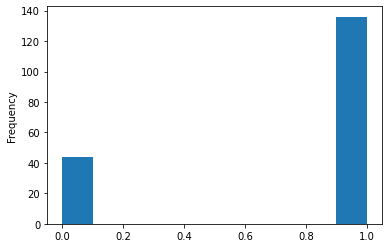

In [25]:
X['Пол'].plot.hist()

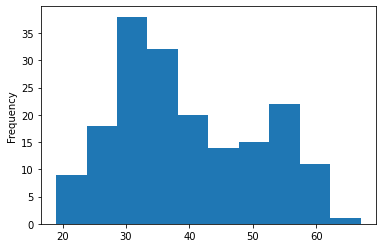

In [26]:
X['Полных лет'].plot.hist()

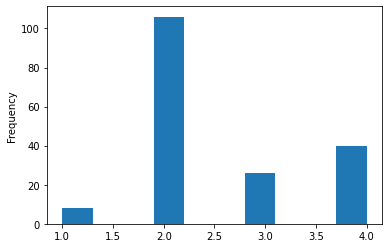

In [27]:
X['Образование(0-начальное, 4-высшее)'].plot.hist()

In [28]:
# X['Удовлетворенность семеными отношениями'].plot.hist()

In [29]:
# X['Удовлетворенность материальным положением'].plot.hist()

In [30]:
# X['Здоровье от 1 до 10'].plot.hist()

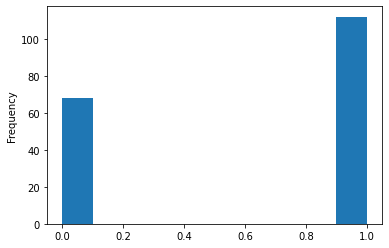

In [31]:
X['Были ли нарушения сна'].plot.hist()

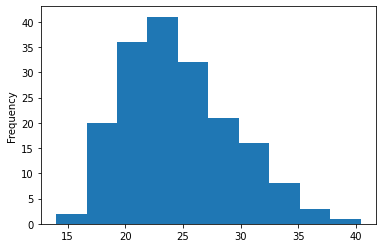

In [32]:
X['ИМТ'].plot.hist()

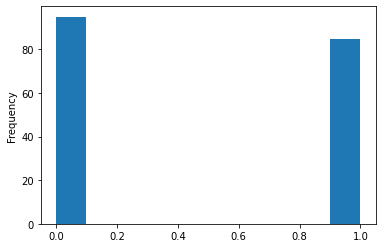

In [33]:
X['Операции'].plot.hist()

In [34]:
# X['Аллергии'].plot.hist()

In [35]:
# X['Забол кожи'].plot.hist()

In [36]:
# X['ГБ'].plot.hist()

In [37]:
# X['Панкреатит'].plot.hist()

In [38]:
# X['Дисфункция ЖКТ'].plot.hist()

In [39]:
# X['ЧМТ'].plot.hist()

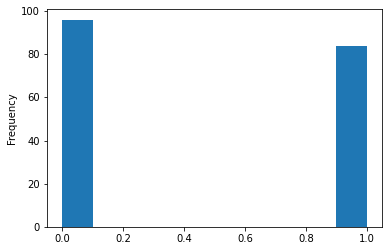

In [40]:
X['Насл отягощенность'].plot.hist()

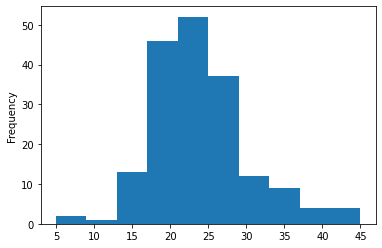

In [41]:
X['Дебют'].plot.hist()

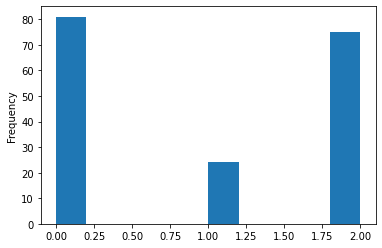

In [42]:
X['Частота госпит'].plot.hist()

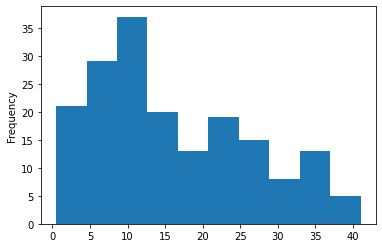

In [43]:
X['Стаж шизофр'].plot.hist()

In [44]:
# X['P'].plot.hist()

In [45]:
# X['N'].plot.hist()

In [46]:
# X['G'].plot.hist()

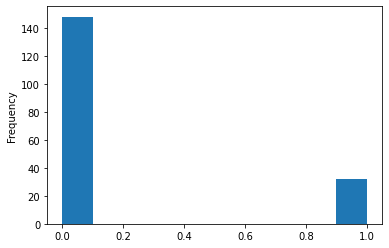

In [47]:
X['Была попытка суицида?'].plot.hist()

In [48]:
X.min()

Пол                                               0.000000
Полных лет                                       19.000000
Образование(0-начальное, 4-высшее)                1.000000
Род занятий(не работает-0, работает-1             0.000000
Семейное положение(холост-0, 1-женат/замужем)     0.000000
Были ли нарушения сна                             0.000000
ИМТ                                              14.005112
Операции                                          0.000000
ЧМТ с потерей сознания                            0.000000
Насл отягощенность                                0.000000
Дебют                                             5.000000
Частота госпит                                    0.000000
Стаж шизофр                                       0.500000
Была попытка суицида?                             0.000000
dtype: float32

In [49]:
X.max()

Пол                                               1.000000
Полных лет                                       67.000000
Образование(0-начальное, 4-высшее)                4.000000
Род занятий(не работает-0, работает-1             1.000000
Семейное положение(холост-0, 1-женат/замужем)     1.000000
Были ли нарушения сна                             1.000000
ИМТ                                              40.404041
Операции                                          1.000000
ЧМТ с потерей сознания                            1.000000
Насл отягощенность                                1.000000
Дебют                                            45.000000
Частота госпит                                    2.000000
Стаж шизофр                                      41.000000
Была попытка суицида?                             1.000000
dtype: float32

In [50]:
# X['Стаж шизофр'] = X['Стаж шизофр']/41

In [51]:
# X['Стаж шизофр'].plot.hist()

In [52]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)

In [53]:
X_scaled

array([[1.        , 0.27083334, 1.        , ..., 0.        , 0.07901235,
        0.        ],
       [1.        , 0.14583334, 0.33333334, ..., 0.5       , 0.03703704,
        0.        ],
       [1.        , 0.625     , 0.33333334, ..., 1.        , 0.5555556 ,
        0.        ],
       ...,
       [0.        , 0.39583334, 0.33333334, ..., 1.        , 0.11111111,
        1.        ],
       [1.        , 0.16666666, 1.        , ..., 0.        , 0.1851852 ,
        0.        ],
       [1.        , 0.35416666, 1.        , ..., 0.5       , 0.0617284 ,
        0.        ]], dtype=float32)

### recursive feature elimination (feature selection)

In [54]:
# Without scaling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, n_features_to_select=5) 
selector = rfe.fit(X,y)
selector.support_

array([False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True])

In [55]:
selector.ranking_

array([ 2,  1,  9,  3,  5,  1, 10,  4,  7,  6,  1,  8,  1,  1])

In [56]:
# With scaling

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)

In [57]:
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, n_features_to_select=5) 
selector = rfe.fit(X_scaled,y)
X.columns[selector.support_]

Index(['Полных лет', 'Были ли нарушения сна', 'Дебют', 'Стаж шизофр',
       'Была попытка суицида?'],
      dtype='object')

In [58]:
selector.ranking_


array([ 2,  1, 10,  3,  5,  1,  9,  4,  8,  7,  1,  6,  1,  1])

[False,  Полных лет, False, False, False, False, False, False, False,
       False, False, False, False,  Дебют, False,  Стаж шизофр, False,  N,
        G])

Полных лет, G, N, Стаж шизофр, Дебют

In [59]:
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, n_features_to_select=3) 
selector = rfe.fit(X_scaled,y)

X.columns[selector.support_]
# Полных лет Стаж шизофр, Дебют

Index(['Полных лет', 'Дебют', 'Стаж шизофр'], dtype='object')

In [60]:
selector.ranking_


array([ 4,  1, 12,  5,  7,  2, 11,  6, 10,  9,  1,  8,  1,  3])

### ridge regression

In [61]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_scaled, y)
clf.coef_

array([ 0.21764179, -0.0213717 , -0.01562798, -0.12172595,  0.08317266,
        0.25420883, -0.0289039 ,  0.0777512 , -0.0414106 ,  0.03882395,
        0.03311609, -0.03647691, -0.0297274 ,  0.21386577], dtype=float32)

In [62]:
clf.intercept_

0.2367357

LASSO regression (feature selection)

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [66]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [67]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.259 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.227 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.234 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.213 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.248 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.264 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.236 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.217 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.257 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.264 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [68]:
search.best_params_


{'model__alpha': 0.1}

In [69]:
coefficients = search.best_estimator_.named_steps['model'].coef_


In [70]:
coefficients

array([ 0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.03737169, -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ], dtype=float32)

In [71]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03737169, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

In [72]:
np.array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
        'Были ли нарушения сна', 'ИМТ', 'Операции',
       'ЧМТ с потерей сознания','Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр',
       'Была попытка суицида?'])[importance > 0]


array(['Были ли нарушения сна'], dtype='<U34')

In [73]:
np.array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
        'Были ли нарушения сна', 'ИМТ', 'Операции',
       'ЧМТ с потерей сознания','Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр',
       'Была попытка суицида?'])[importance == 0]


array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'ИМТ', 'Операции', 'ЧМТ с потерей сознания', 'Насл отягощенность',
       'Дебют', 'Частота госпит', 'Стаж шизофр', 'Была попытка суицида?'],
      dtype='<U34')

In [74]:
# Find 3 best predictors witn chi square and ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # chi^2
from sklearn.feature_selection import f_classif # ANOVA

X_chi2 = SelectKBest(chi2, k=5).fit_transform(X, y)
X_anova = SelectKBest(f_classif, k=5).fit_transform(X, y)

Get the Top Selected Features

https://ml2021.medium.com/chi-square-and-anova-feature-selection-for-ml-5e1063ab0991

In [75]:
f_score = chi2(X, y)
f_score
# The first array is the F_score , 2nd one is the P_values
# the smaller the P value the more significant the difference in the features

(array([0.65882353, 0.04352515, 0.04217093, 0.35714286, 0.36571429,
        5.        , 0.03437752, 1.42016807, 0.        , 0.44081633,
        0.23170484, 0.14778325, 0.09473732, 5.15714286]),
 array([0.41697559, 0.83473957, 0.83729429, 0.55009732, 0.54534967,
        0.02534732, 0.85290608, 0.23337574, 1.        , 0.50672871,
        0.63026259, 0.70066283, 0.75823888, 0.02315095]))

In [76]:
pvalues = pd.Series(f_score[1])
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

Была попытка суицида?                            0.023151
Были ли нарушения сна                            0.025347
Операции                                         0.233376
Пол                                              0.416976
Насл отягощенность                               0.506729
Семейное положение(холост-0, 1-женат/замужем)    0.545350
Род занятий(не работает-0, работает-1            0.550097
Дебют                                            0.630263
Частота госпит                                   0.700663
Стаж шизофр                                      0.758239
Полных лет                                       0.834740
Образование(0-начальное, 4-высшее)               0.837294
ИМТ                                              0.852906
ЧМТ с потерей сознания                           1.000000
dtype: float64

In [77]:
# Now use the SelectKBest Model with the chi2 classifier to find the best features

sel_ = SelectKBest(chi2, k=5).fit(X, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Были ли нарушения сна', 'Операции', 'Насл отягощенность',
       'Была попытка суицида?'],
      dtype='object')

In [78]:
ds.head(20)

,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(не работает-0, работает-1","Семейное положение(холост-0, 1-женат/замужем)",Были ли нарушения сна,ИМТ,Операции,ЧМТ с потерей сознания,Насл отягощенность,Дебют,Частота госпит,Стаж шизофр,Была попытка суицида?,PSQI,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5,PSQI больше 5
0,1.0,32.0,4.0,0.0,0.0,1.0,24.012346,0.0,0.0,0.0,28.299999,0.0,3.70,0.0,6.0,0.0,0.0,0.0,1.0
1,1.0,26.0,2.0,0.0,0.0,1.0,20.244898,0.0,0.0,0.0,26.000000,1.0,2.00,0.0,8.0,0.0,1.0,1.0,1.0
2,1.0,49.0,2.0,0.0,0.0,0.0,29.752745,0.0,0.0,0.0,26.000000,2.0,23.00,0.0,3.0,0.0,0.0,0.0,0.0
3,1.0,50.0,2.0,0.0,0.0,1.0,22.093170,1.0,1.0,0.0,16.000000,1.0,34.00,0.0,6.0,0.0,0.0,0.0,1.0
4,1.0,39.0,2.0,0.0,0.0,0.0,20.761246,1.0,1.0,1.0,34.000000,0.0,4.00,0.0,4.0,0.0,0.0,0.0,0.0
5,1.0,26.0,2.0,1.0,1.0,1.0,25.737082,0.0,0.0,0.0,25.000000,2.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,35.0,3.0,0.0,0.0,0.0,23.547880,1.0,1.0,0.0,22.799999,2.0,12.20,0.0,8.0,1.0,1.0,0.0,1.0
7,1.0,31.0,3.0,0.0,0.0,1.0,26.128611,0.0,1.0,0.0,22.000000,1.0,9.00,0.0,6.0,0.0,0.0,0.0,1.0
8,1.0,23.0,2.0,0.0,0.0,0.0,18.812147,1.0,0.0,0.0,17.330000,0.0,5.67,0.0,8.0,0.0,0.0,0.0,1.0
9,1.0,37.0,3.0,1.0,0.0,0.0,20.761246,0.0,1.0,1.0,26.000000,2.0,11.00,0.0,7.0,0.0,0.0,0.0,1.0


In [79]:
X_chi2 # ['Здоровье от 1 до 10', 'Были ли нарушения сна', 'P', 'G', 'Была попытка суицида?']

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1.

ANOVA

In [80]:
univariate = f_classif(X, y)
univariate

(array([2.7057238e+00, 1.3677023e-02, 1.3590264e-01, 4.3057406e-01,
        4.0778628e-01, 1.4127000e+01, 3.7693277e-02, 2.7013304e+00,
        0.0000000e+00, 8.2112098e-01, 1.3415864e-01, 1.6337517e-01,
        1.4161005e-02, 6.4264417e+00], dtype=float32),
 array([1.0175351e-01, 9.0703249e-01, 7.1282691e-01, 5.1255471e-01,
        5.2391601e-01, 2.3148650e-04, 8.4628171e-01, 1.0202970e-01,
        1.0000000e+00, 3.6607760e-01, 7.1459359e-01, 6.8655312e-01,
        9.0540951e-01, 1.2104519e-02], dtype=float32))

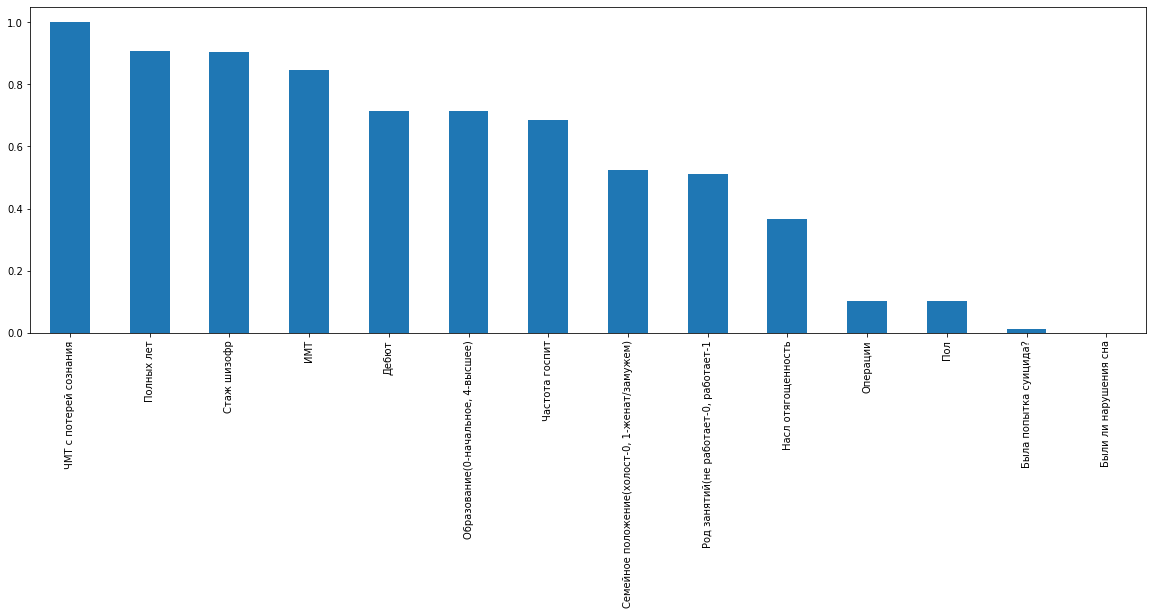

In [81]:
# The 2nd values are the PValue and we capture those below
univariate = pd.Series(univariate[1])
univariate.index = X.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [82]:
# Get TOP 3 features
sel_ = SelectKBest(f_classif, k=3).fit(X, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Были ли нарушения сна', 'Была попытка суицида?'], dtype='object')

In [83]:
# Get TOP 5 features
sel_ = SelectKBest(f_classif, k=5).fit(X, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Были ли нарушения сна', 'Операции', 'Насл отягощенность',
       'Была попытка суицида?'],
      dtype='object')

In [84]:
X_anova 

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1.

In [85]:
# Find 4 best predictors witn scalied data

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)
X_chi2_scaled = SelectKBest(chi2, k=4).fit_transform(X_scaled, y)
X_anova_scaled = SelectKBest(f_classif, k=4).fit_transform(X_scaled, y)

In [86]:
f_score_scaled = chi2(X_scaled, y)
f_score_scaled
# The first array is the F_score , 2nd one is the P_values
# the smaller the P value the more significant the difference in the features

(array([6.58823529e-01, 1.74948487e-03, 2.31586224e-02, 3.57142857e-01,
        3.65714286e-01, 5.00000000e+00, 3.00568182e-03, 1.42016807e+00,
        0.00000000e+00, 4.40816327e-01, 7.36602681e-03, 7.38916256e-02,
        2.41444284e-03, 5.15714286e+00]),
 array([0.41697559, 0.96663674, 0.8790453 , 0.55009732, 0.54534967,
        0.02534732, 0.9562786 , 0.23337574, 1.        , 0.50672871,
        0.93160509, 0.78575263, 0.96081013, 0.02315095]))

In [87]:
pvalues = pd.Series(f_score_scaled[1])
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

Была попытка суицида?                            0.023151
Были ли нарушения сна                            0.025347
Операции                                         0.233376
Пол                                              0.416976
Насл отягощенность                               0.506729
Семейное положение(холост-0, 1-женат/замужем)    0.545350
Род занятий(не работает-0, работает-1            0.550097
Частота госпит                                   0.785753
Образование(0-начальное, 4-высшее)               0.879045
Дебют                                            0.931605
ИМТ                                              0.956279
Стаж шизофр                                      0.960810
Полных лет                                       0.966637
ЧМТ с потерей сознания                           1.000000
dtype: float64

In [88]:
# Now use the SelectKBest Model with the chi2 classifier to find the best features

sel_ = SelectKBest(chi2, k=5).fit(X_scaled, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Были ли нарушения сна', 'Операции', 'Насл отягощенность',
       'Была попытка суицида?'],
      dtype='object')

ANOVA

In [89]:
univariate_scaled = f_classif(X_scaled, y)
univariate_scaled

(array([2.7057238e+00, 1.3638137e-02, 1.3597526e-01, 4.3057406e-01,
        4.0778628e-01, 1.4127000e+01, 3.7138164e-02, 2.7013304e+00,
        0.0000000e+00, 8.2112098e-01, 1.3372521e-01, 1.6337517e-01,
        1.4198870e-02, 6.4264417e+00], dtype=float32),
 array([1.0175351e-01, 9.0716410e-01, 7.1275359e-01, 5.1255471e-01,
        5.2391601e-01, 2.3148650e-04, 8.4740371e-01, 1.0202970e-01,
        1.0000000e+00, 3.6607760e-01, 7.1503466e-01, 6.8655312e-01,
        9.0528375e-01, 1.2104519e-02], dtype=float32))

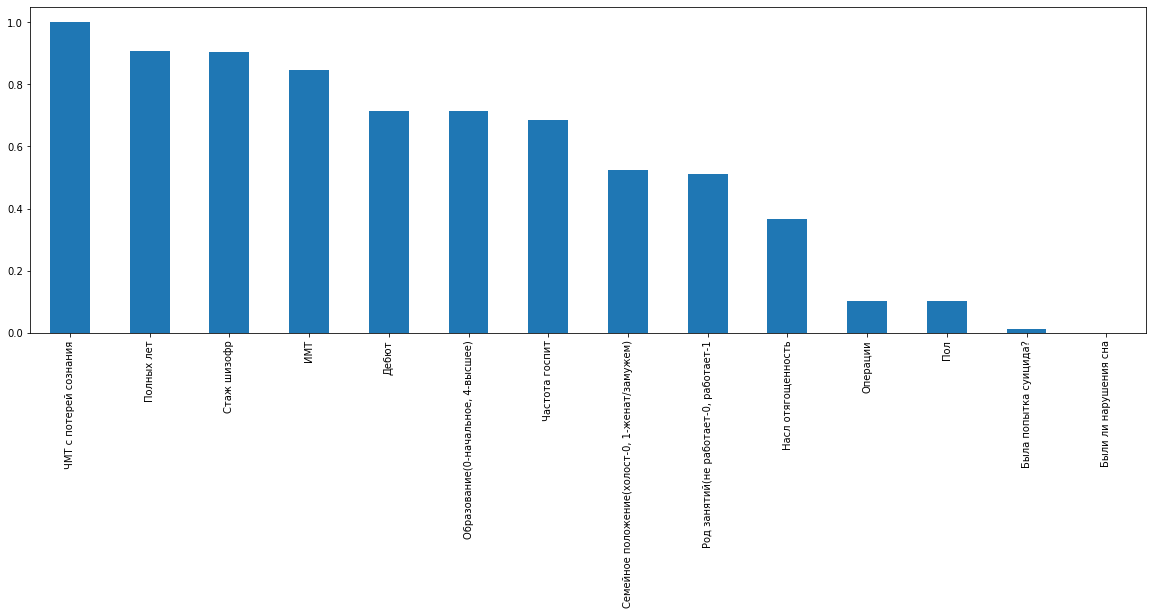

In [90]:
# The 2nd values are the PValue and we capture those below
univariate_scaled = pd.Series(univariate_scaled[1])
univariate_scaled.index = X.columns
univariate_scaled.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [91]:
# Get TOP 5 features
sel_ = SelectKBest(f_classif, k=5).fit(X_scaled, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Были ли нарушения сна', 'Операции', 'Насл отягощенность',
       'Была попытка суицида?'],
      dtype='object')

In [92]:
# X_chi2_scaled # Были ли нарушения сна, Динамека веса за год, Аллергии, ГБ

In [93]:
# X_anova_scaled # Были ли нарушения сна, Аллергии, P, G

In [94]:
# How many times and which features were the most influential?

# Аллергии 4
# Были ли нарушения сна  3
# P 3
# G 3
# Динамека веса за год 1 
# ГБ 1
# Стаж шизофр 1

In [95]:
print(X)

     Пол  Полных лет  Образование(0-начальное, 4-высшее)  \
0    1.0        32.0                                 4.0   
1    1.0        26.0                                 2.0   
2    1.0        49.0                                 2.0   
3    1.0        50.0                                 2.0   
4    1.0        39.0                                 2.0   
..   ...         ...                                 ...   
175  1.0        53.0                                 4.0   
176  1.0        36.0                                 4.0   
177  0.0        38.0                                 2.0   
178  1.0        27.0                                 4.0   
179  1.0        36.0                                 4.0   

     Род занятий(не работает-0, работает-1  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
.. 

In [96]:
print(y)

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
175    1.0
176    0.0
177    1.0
178    0.0
179    0.0
Name: PSQI больше 5, Length: 180, dtype: float32


In [97]:
# Using best features
# X = X[['Аллергии', 'Были ли нарушения сна', 'P', 'G']]

# X = X[['Забол кожи', 'Были ли нарушения сна', 'Панкреатит', 'ГБ']]

# X = X[['Удовлетворенность материальным положением', 'Были ли нарушения сна', 'Забол кожи', 'P', 'G']]

# X = X[['Забол кожи', 'Были ли нарушения сна', 'Панкреатит', 'ГБ', 'P']]

# X = X[['P', 'G', 'ИМТ', 'Были ли нарушения сна', 'N']]

# X = X[['Были ли нарушения сна', 'Забол кожи', 'P']]

# X = X[['Были ли нарушения сна', 'Операции', 'P', 'G']]


# X = X[['Полных лет', 'Дебют', 'Стаж шизофр', 'P', 'N', 'G']]



# X = X[['Была попытка суицида?', 'Дебют', 'Стаж шизофр', 'P', 'N', 'G']]

# recursive feature elimination
# X = X[['Полных лет', 'Дебют', 'Стаж шизофр', 'N', 'G']]

# ANOVA
# X = X[['Здоровье от 1 до 10', 'Были ли нарушения сна', 'P', 'G', 'Была попытка суицида?']]

# chi2
# X = X[['Были ли нарушения сна', 'Операции', 'P', 'G', 'Была попытка суицида?']]



# Added data without columns that will not be used

# ANOVA
# X = X[['Пол', 'Были ли нарушения сна', 'Операции', 'Насл отягощенность', 'Была попытка суицида?']]
# RFE
X = X[['Полных лет', 'Были ли нарушения сна', 'Дебют', 'Стаж шизофр', 'Была попытка суицида?']]

# X = X[['Были ли нарушения сна', 'Была попытка суицида?']]

In [98]:
featuresNum = len(X.columns)

In [99]:
X

,Полных лет,Были ли нарушения сна,Дебют,Стаж шизофр,Была попытка суицида?
0,32.0,1.0,28.299999,3.7,0.0
1,26.0,1.0,26.000000,2.0,0.0
2,49.0,0.0,26.000000,23.0,0.0
3,50.0,1.0,16.000000,34.0,0.0
4,39.0,0.0,34.000000,4.0,0.0
...,...,...,...,...,...
175,53.0,1.0,26.000000,27.0,0.0
176,36.0,1.0,13.000000,23.0,0.0
177,38.0,1.0,33.000000,5.0,1.0
178,27.0,1.0,19.000000,8.0,0.0


In [100]:
# Get helper functions file
import os
if not os.path.exists("helper_functions.py"):
    print("Downloading helper functions...")
    !wget https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/extras/helper_functions.py
else:
    print("Helper functions file already exists, skipping download...")

Helper functions file already exists, skipping download...


In [101]:
# Create TensorBoard callback
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
# checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                       montior="val_accuracy", # save the model weights with best validation accuracy
#                                                       save_best_only=True, # only save the best weights
#                                                       save_weights_only=True) # only save model weights (not whole model)
#                                                       # verbose=1) # don't print out whether or not model is being saved

# Create a function to implment a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_accuracy", # was 'val_loss'
                                            verbose=0, #only output a limited amount of text
                                            save_best_only=True)


In [102]:
# Train/valid/test split
tf.random.set_seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.001)


# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)
X_test_scaled = minmax_scaler.transform(X_test)

In [103]:
# Linear SVC test
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)
print(lsvc)


LinearSVC()


In [104]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


LinearSVC()

In [105]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

Score:  0.5597014925373134


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [106]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

CV average score: 0.57


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [107]:
from sklearn.metrics import confusion_matrix

# ypred = lsvc.predict(X_test)

# cm = confusion_matrix(X_test, y_test)
# print(cm)


In [108]:
from sklearn.metrics import classification_report
# cr = classification_report(X_train, y_train)
# print(cr)


In [109]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
# We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
Range_k = range(1,130)
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)


Confusion Matrix:
[[1]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Text(0, 0.5, 'Accuracy')

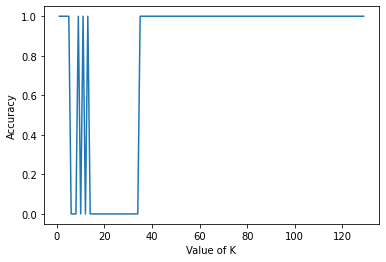

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")


In [111]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='Тренировочные_потери')
  plt.plot(epochs, val_loss, label='Валидационные_потери')
  plt.title('Потери')
  plt.xlabel('Эпоха')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='Тренировочная_точность')
  plt.plot(epochs, val_accuracy, label='Валидационная_точность')
  plt.title('Точность')
  plt.xlabel('Эпоха')
  plt.legend();


In [112]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history1 = model1.fit(X_train_scaled, 
                    y_train, 
                    epochs=40,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model1.name)])

Epoch 1/40
5/5 [==============================] - 5s 745ms/step - loss: 0.6956 - accuracy: 0.3731 - val_loss: 0.6878 - val_accuracy: 0.6667
Epoch 2/40
5/5 [==============================] - 0s 30ms/step - loss: 0.6907 - accuracy: 0.5522 - val_loss: 0.6805 - val_accuracy: 0.6667
Epoch 3/40
5/5 [==============================] - 0s 40ms/step - loss: 0.6897 - accuracy: 0.5522 - val_loss: 0.6797 - val_accuracy: 0.6667
Epoch 4/40
5/5 [==============================] - 0s 42ms/step - loss: 0.6895 - accuracy: 0.5522 - val_loss: 0.6773 - val_accuracy: 0.6667
Epoch 5/40
5/5 [==============================] - 0s 29ms/step - loss: 0.6889 - accuracy: 0.5522 - val_loss: 0.6742 - val_accuracy: 0.6667
Epoch 6/40
5/5 [==============================] - 0s 39ms/step - loss: 0.6886 - accuracy: 0.5522 - val_loss: 0.6713 - val_accuracy: 0.6667
Epoch 7/40
5/5 [==============================] - 0s 30ms/step - loss: 0.6882 - accuracy: 0.5522 - val_loss: 0.6692 - val_accuracy: 0.6667
Epoch 8/40
5/5 [==========

In [113]:
model1.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 59ms/step - loss: 0.6056 - accuracy: 1.0000


[0.6055558919906616, 1.0]

In [114]:
model1 = tf.keras.models.load_model(f"/content/model_experiments/{model1.name}")
model1.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 270ms/step - loss: 0.6768 - accuracy: 1.0000


[0.676813006401062, 1.0]

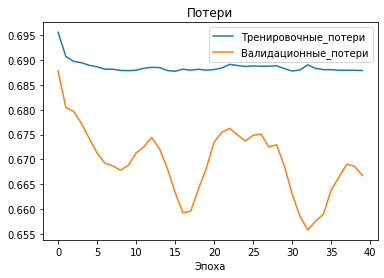

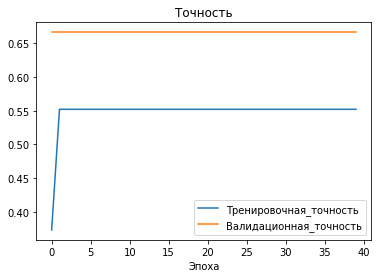

In [115]:
plot_loss_curves(history1)

In [116]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history2 = model2.fit(X_train_scaled, 
                    y_train, 
                    epochs=40,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model2.name)])

Epoch 1/40
5/5 [==============================] - 3s 483ms/step - loss: 0.6883 - accuracy: 0.5299 - val_loss: 0.6434 - val_accuracy: 0.6667
Epoch 2/40
5/5 [==============================] - 0s 41ms/step - loss: 0.6794 - accuracy: 0.5522 - val_loss: 0.6483 - val_accuracy: 0.6667
Epoch 3/40
5/5 [==============================] - 0s 22ms/step - loss: 0.6694 - accuracy: 0.5522 - val_loss: 0.6629 - val_accuracy: 0.6667
Epoch 4/40
5/5 [==============================] - 1s 356ms/step - loss: 0.6642 - accuracy: 0.6343 - val_loss: 0.6526 - val_accuracy: 0.6889
Epoch 5/40
5/5 [==============================] - 0s 9ms/step - loss: 0.6485 - accuracy: 0.6567 - val_loss: 0.6346 - val_accuracy: 0.6667
Epoch 6/40
5/5 [==============================] - 0s 10ms/step - loss: 0.6434 - accuracy: 0.6716 - val_loss: 0.6446 - val_accuracy: 0.6667
Epoch 7/40
5/5 [==============================] - 0s 11ms/step - loss: 0.6352 - accuracy: 0.6791 - val_loss: 0.6808 - val_accuracy: 0.5778
Epoch 8/40
5/5 [==========

In [117]:
model2.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 0.2513 - accuracy: 1.0000


[0.2512815296649933, 1.0]

In [118]:
model2 = tf.keras.models.load_model(f"/content/model_experiments/{model2.name}")
model2.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 0.5255 - accuracy: 1.0000


[0.5255307555198669, 1.0]

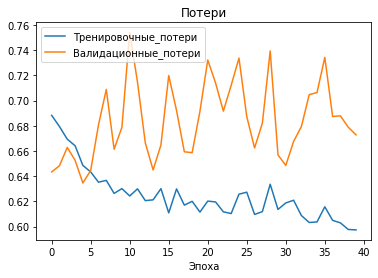

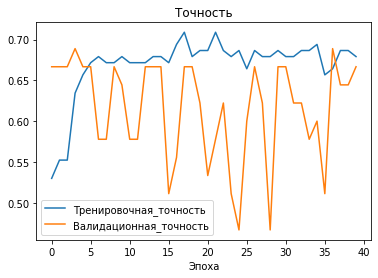

In [119]:
plot_loss_curves(history2)

In [120]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history3 = model3.fit(X_train_scaled, 
                    y_train, 
                    epochs=40,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model3.name)])

Epoch 1/40
5/5 [==============================] - 2s 252ms/step - loss: 0.6750 - accuracy: 0.5597 - val_loss: 0.6258 - val_accuracy: 0.6889
Epoch 2/40
5/5 [==============================] - 0s 10ms/step - loss: 0.6603 - accuracy: 0.6269 - val_loss: 0.7158 - val_accuracy: 0.5333
Epoch 3/40
5/5 [==============================] - 0s 10ms/step - loss: 0.6490 - accuracy: 0.6493 - val_loss: 0.6954 - val_accuracy: 0.5778
Epoch 4/40
5/5 [==============================] - 0s 10ms/step - loss: 0.6362 - accuracy: 0.6791 - val_loss: 0.6529 - val_accuracy: 0.6667
Epoch 5/40
5/5 [==============================] - 0s 10ms/step - loss: 0.6199 - accuracy: 0.6791 - val_loss: 0.6876 - val_accuracy: 0.6000
Epoch 6/40
5/5 [==============================] - 0s 13ms/step - loss: 0.6215 - accuracy: 0.6791 - val_loss: 0.7220 - val_accuracy: 0.5778
Epoch 7/40
5/5 [==============================] - 0s 12ms/step - loss: 0.6230 - accuracy: 0.6716 - val_loss: 0.6911 - val_accuracy: 0.5778
Epoch 8/40
5/5 [==========

In [121]:
model3.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.5044 - accuracy: 1.0000


[0.5043796896934509, 1.0]

In [122]:
model3 = tf.keras.models.load_model(f"/content/model_experiments/{model3.name}")
model3.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 135ms/step - loss: 0.3373 - accuracy: 1.0000


[0.3372947871685028, 1.0]

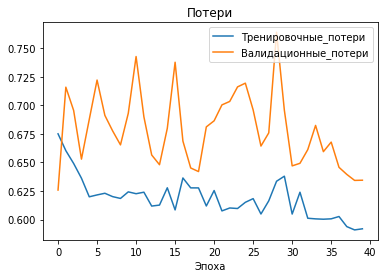

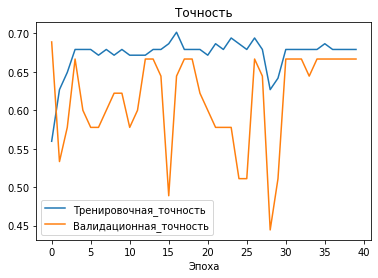

In [123]:
plot_loss_curves(history3)

In [124]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history4 = model4.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model4.name)])

Epoch 1/100
5/5 [==============================] - 2s 247ms/step - loss: 0.6946 - accuracy: 0.3806 - val_loss: 0.6908 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6924 - accuracy: 0.5522 - val_loss: 0.6879 - val_accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6916 - accuracy: 0.5522 - val_loss: 0.6867 - val_accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6907 - accuracy: 0.5522 - val_loss: 0.6819 - val_accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6851 - accuracy: 0.5522 - val_loss: 0.6673 - val_accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6784 - accuracy: 0.5522 - val_loss: 0.6541 - val_accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6718 - accuracy: 0.5522 - val_loss: 0.6483 - val_accuracy: 0.6667
Epoch 8/100
5/5 [===

In [125]:
model4.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.2141 - accuracy: 1.0000


[0.21406498551368713, 1.0]

In [126]:
model4 = tf.keras.models.load_model(f"/content/model_experiments/{model4.name}")
model4.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 170ms/step - loss: 0.6879 - accuracy: 1.0000


[0.6878563761711121, 1.0]

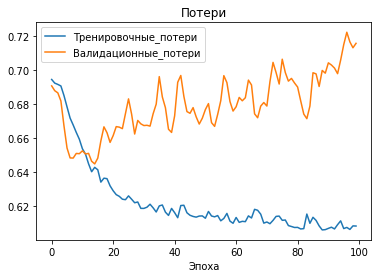

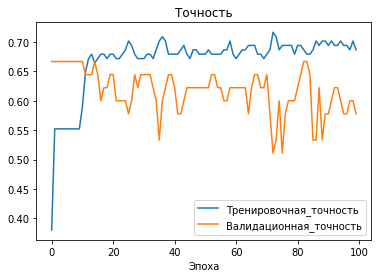

In [127]:
plot_loss_curves(history4)

In [128]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history5 = model5.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model5.name)])

Epoch 1/100
5/5 [==============================] - 2s 247ms/step - loss: 0.6928 - accuracy: 0.5373 - val_loss: 0.6731 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6835 - accuracy: 0.5522 - val_loss: 0.6638 - val_accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6803 - accuracy: 0.5522 - val_loss: 0.6629 - val_accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6777 - accuracy: 0.5522 - val_loss: 0.6581 - val_accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6710 - accuracy: 0.5597 - val_loss: 0.6535 - val_accuracy: 0.6222
Epoch 6/100
5/5 [==============================] - 1s 213ms/step - loss: 0.6630 - accuracy: 0.6493 - val_loss: 0.6513 - val_accuracy: 0.6889
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6538 - accuracy: 0.6493 - val_loss: 0.6491 - val_accuracy: 0.6667
Epoch 8/100
5/5 [==

In [129]:
model5.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.1740 - accuracy: 1.0000


[0.17397136986255646, 1.0]

In [130]:
model5 = tf.keras.models.load_model(f"/content/model_experiments/{model5.name}")
model5.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 0.5308 - accuracy: 1.0000


[0.5308220386505127, 1.0]

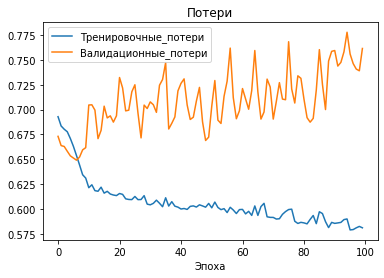

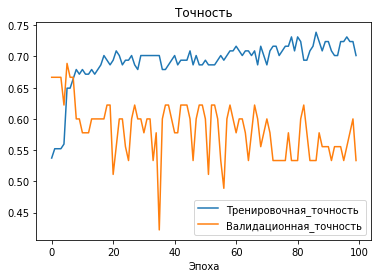

In [131]:
plot_loss_curves(history5)

In [132]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history6 = model6.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model6.name)])

Epoch 1/100
5/5 [==============================] - 2s 260ms/step - loss: 0.6865 - accuracy: 0.5149 - val_loss: 0.6512 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6701 - accuracy: 0.5522 - val_loss: 0.6442 - val_accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6604 - accuracy: 0.5896 - val_loss: 0.6589 - val_accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6530 - accuracy: 0.6716 - val_loss: 0.6623 - val_accuracy: 0.6000
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6360 - accuracy: 0.6791 - val_loss: 0.6631 - val_accuracy: 0.5778
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6271 - accuracy: 0.6716 - val_loss: 0.6751 - val_accuracy: 0.5778
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6182 - accuracy: 0.6716 - val_loss: 0.6914 - val_accuracy: 0.5778
Epoch 8/100
5/5 [==

In [133]:
model6.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.2529 - accuracy: 1.0000


[0.2528895139694214, 1.0]

In [134]:
model6 = tf.keras.models.load_model(f"/content/model_experiments/{model6.name}")
model6.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 0.5496 - accuracy: 1.0000


[0.5495712757110596, 1.0]

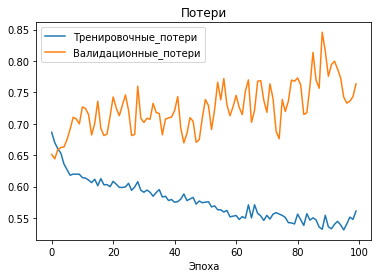

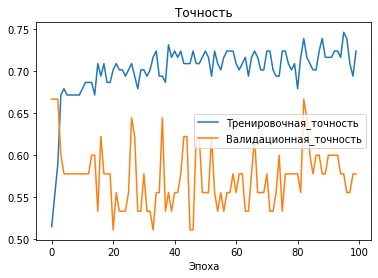

In [135]:
plot_loss_curves(history6)

In [136]:
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model7.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history7 = model7.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model7.name)])

Epoch 1/100
5/5 [==============================] - 2s 244ms/step - loss: 0.6942 - accuracy: 0.3582 - val_loss: 0.6922 - val_accuracy: 0.5556
Epoch 2/100
5/5 [==============================] - 1s 199ms/step - loss: 0.6938 - accuracy: 0.5075 - val_loss: 0.6918 - val_accuracy: 0.5778
Epoch 3/100
5/5 [==============================] - 1s 204ms/step - loss: 0.6936 - accuracy: 0.5448 - val_loss: 0.6917 - val_accuracy: 0.6444
Epoch 4/100
5/5 [==============================] - 1s 207ms/step - loss: 0.6934 - accuracy: 0.5149 - val_loss: 0.6915 - val_accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5299 - val_loss: 0.6913 - val_accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5373 - val_loss: 0.6910 - val_accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6930 - accuracy: 0.5597 - val_loss: 0.6907 - val_accuracy: 0.6667
Epoch 8/100
5/5 

In [137]:
model7.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.3412 - accuracy: 1.0000


[0.34124112129211426, 1.0]

In [138]:
model7 = tf.keras.models.load_model(f"/content/model_experiments/{model7.name}")
model7.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 156ms/step - loss: 0.6908 - accuracy: 1.0000


[0.6908367276191711, 1.0]

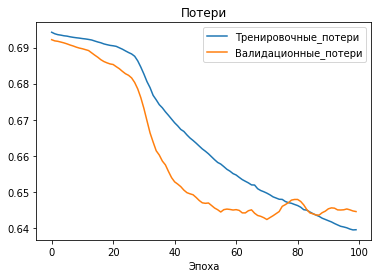

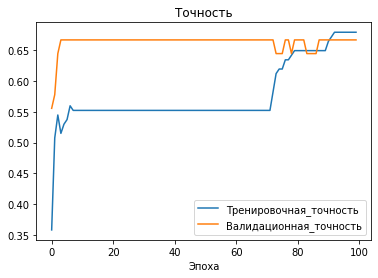

In [139]:
plot_loss_curves(history7)

In [140]:
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model8.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history8 = model8.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model8.name)])

Epoch 1/100
5/5 [==============================] - 2s 244ms/step - loss: 0.6967 - accuracy: 0.4403 - val_loss: 0.6942 - val_accuracy: 0.4444
Epoch 2/100
5/5 [==============================] - 1s 213ms/step - loss: 0.6948 - accuracy: 0.4179 - val_loss: 0.6917 - val_accuracy: 0.6000
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6935 - accuracy: 0.4776 - val_loss: 0.6904 - val_accuracy: 0.6000
Epoch 4/100
5/5 [==============================] - 1s 211ms/step - loss: 0.6925 - accuracy: 0.5224 - val_loss: 0.6884 - val_accuracy: 0.6444
Epoch 5/100
5/5 [==============================] - 1s 204ms/step - loss: 0.6913 - accuracy: 0.5448 - val_loss: 0.6864 - val_accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6904 - accuracy: 0.5299 - val_loss: 0.6844 - val_accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5746 - val_loss: 0.6826 - val_accuracy: 0.6667
Epoch 8/100
5/5 [

In [141]:
model8.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.3522 - accuracy: 1.0000


[0.35216233134269714, 1.0]

In [142]:
model8 = tf.keras.models.load_model(f"/content/model_experiments/{model8.name}")
model8.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 157ms/step - loss: 0.5439 - accuracy: 1.0000


[0.5438888669013977, 1.0]

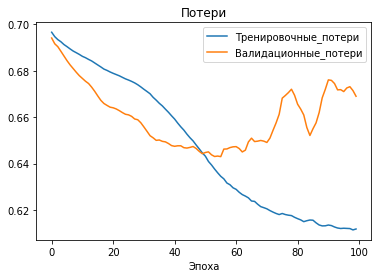

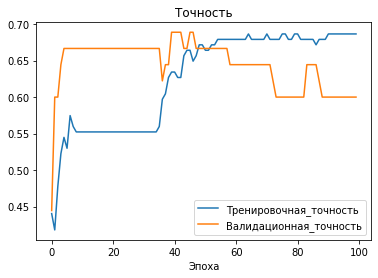

In [143]:
plot_loss_curves(history8)

In [144]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model9.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history9 = model9.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model9.name)])

Epoch 1/100
5/5 [==============================] - 2s 253ms/step - loss: 0.6923 - accuracy: 0.4701 - val_loss: 0.6833 - val_accuracy: 0.5778
Epoch 2/100
5/5 [==============================] - 1s 224ms/step - loss: 0.6877 - accuracy: 0.5299 - val_loss: 0.6778 - val_accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6850 - accuracy: 0.5448 - val_loss: 0.6758 - val_accuracy: 0.6444
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6833 - accuracy: 0.5522 - val_loss: 0.6721 - val_accuracy: 0.6222
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6805 - accuracy: 0.5597 - val_loss: 0.6684 - val_accuracy: 0.6222
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6785 - accuracy: 0.5597 - val_loss: 0.6647 - val_accuracy: 0.6222
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.5672 - val_loss: 0.6616 - val_accuracy: 0.6222
Epoch 8/100
5/5 [=

In [145]:
model9.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 35ms/step - loss: 0.2438 - accuracy: 1.0000


[0.24383191764354706, 1.0]

In [146]:
model9 = tf.keras.models.load_model(f"/content/model_experiments/{model9.name}")
model9.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 477ms/step - loss: 0.5822 - accuracy: 1.0000


[0.5822413563728333, 1.0]

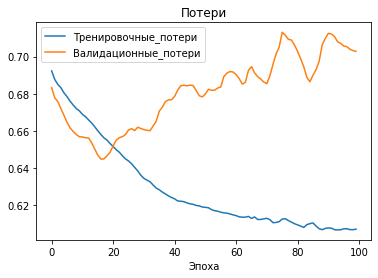

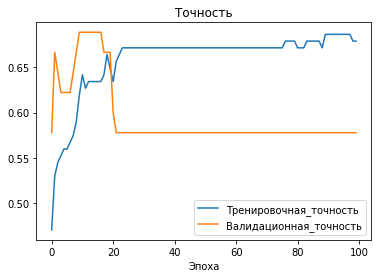

In [147]:
plot_loss_curves(history9)

In [148]:
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model10.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history10 = model10.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model10.name)])

Epoch 1/100
5/5 [==============================] - 2s 260ms/step - loss: 0.6942 - accuracy: 0.3582 - val_loss: 0.6922 - val_accuracy: 0.5556
Epoch 2/100
5/5 [==============================] - 1s 198ms/step - loss: 0.6938 - accuracy: 0.5075 - val_loss: 0.6918 - val_accuracy: 0.5778
Epoch 3/100
5/5 [==============================] - 1s 267ms/step - loss: 0.6936 - accuracy: 0.5448 - val_loss: 0.6917 - val_accuracy: 0.6444
Epoch 4/100
5/5 [==============================] - 1s 316ms/step - loss: 0.6934 - accuracy: 0.5149 - val_loss: 0.6915 - val_accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 0.6933 - accuracy: 0.5299 - val_loss: 0.6913 - val_accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.5373 - val_loss: 0.6910 - val_accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.5597 - val_loss: 0.6907 - val_accuracy: 0.6667
Epoch 8/100
5/5 

In [149]:
model10.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.3412 - accuracy: 1.0000


[0.34124112129211426, 1.0]

In [150]:
model10 = tf.keras.models.load_model(f"/content/model_experiments/{model10.name}")
model10.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.6908 - accuracy: 1.0000


[0.6908367276191711, 1.0]

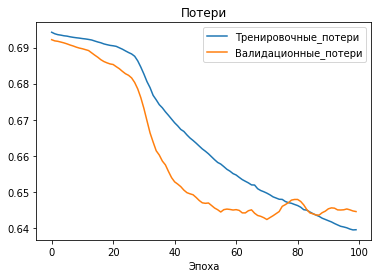

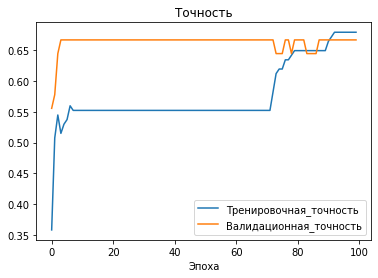

In [151]:
plot_loss_curves(history10)

In [152]:
tf.random.set_seed(42)

model11 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model11.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history11 = model11.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model11.name)])

Epoch 1/100
27/27 [==============================] - 2s 43ms/step - loss: 0.6943 - accuracy: 0.4478 - val_loss: 0.6916 - val_accuracy: 0.6222
Epoch 2/100
27/27 [==============================] - 1s 36ms/step - loss: 0.6933 - accuracy: 0.5448 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5522 - val_loss: 0.6894 - val_accuracy: 0.6667
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5522 - val_loss: 0.6884 - val_accuracy: 0.6667
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5522 - val_loss: 0.6872 - val_accuracy: 0.6667
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5522 - val_loss: 0.6862 - val_accuracy: 0.6667
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5522 - val_loss: 0.6848 - val_accuracy: 0.6667
Epoch 8/100

In [153]:
model11.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 146ms/step - loss: 0.3285 - accuracy: 1.0000


[0.32846206426620483, 1.0]

In [154]:
model11 = tf.keras.models.load_model(f"/content/model_experiments/{model11.name}")
model11.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 162ms/step - loss: 0.6875 - accuracy: 1.0000


[0.6874524354934692, 1.0]

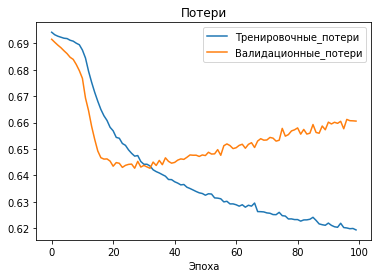

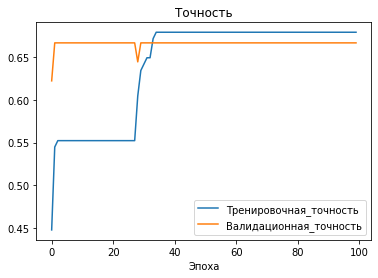

In [155]:
plot_loss_curves(history11)

In [156]:
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model12.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history12 = model12.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=10,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model12.name)])

Epoch 1/100
14/14 [==============================] - 1s 68ms/step - loss: 0.6629 - accuracy: 0.5821 - val_loss: 0.6400 - val_accuracy: 0.6889
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6045 - val_loss: 0.6385 - val_accuracy: 0.6889
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6586 - accuracy: 0.6119 - val_loss: 0.6386 - val_accuracy: 0.6889
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6269 - val_loss: 0.6389 - val_accuracy: 0.6667
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6269 - val_loss: 0.6384 - val_accuracy: 0.6667
Epoch 11/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6642 - val_loss: 0.6407 - val_accuracy: 0.6667
Epoch 12/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6501 - accuracy: 0.6642 - val_loss: 0.6409 - val_accuracy: 0.6667
Epoch 13/

In [157]:
model12.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.3238 - accuracy: 1.0000


[0.3238409757614136, 1.0]

In [158]:
model12 = tf.keras.models.load_model(f"/content/model_experiments/{model12.name}")
model12.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.5189 - accuracy: 1.0000


[0.5189328789710999, 1.0]

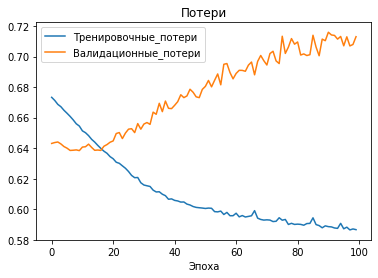

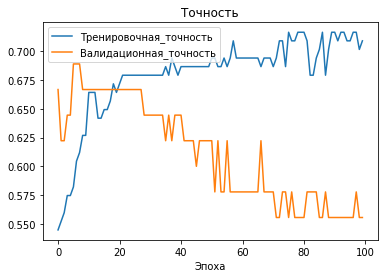

In [159]:
plot_loss_curves(history12)

In [160]:
tf.random.set_seed(42)

model13 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model13.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history13 = model13.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=10,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model13.name)])

Epoch 1/100
14/14 [==============================] - 2s 76ms/step - loss: 0.6969 - accuracy: 0.4403 - val_loss: 0.6934 - val_accuracy: 0.4889
Epoch 2/100
14/14 [==============================] - 1s 64ms/step - loss: 0.6933 - accuracy: 0.5149 - val_loss: 0.6878 - val_accuracy: 0.6444
Epoch 3/100
14/14 [==============================] - 1s 111ms/step - loss: 0.6908 - accuracy: 0.5224 - val_loss: 0.6840 - val_accuracy: 0.6667
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5522 - val_loss: 0.6802 - val_accuracy: 0.6667
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5522 - val_loss: 0.6764 - val_accuracy: 0.6667
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.5522 - val_loss: 0.6729 - val_accuracy: 0.6667
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.5522 - val_loss: 0.6695 - val_accuracy: 0.6667
Epoch 8/1

In [161]:
model13.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.3142 - accuracy: 1.0000


[0.31416791677474976, 1.0]

In [162]:
model13 = tf.keras.models.load_model(f"/content/model_experiments/{model13.name}")
model13.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 0.5349 - accuracy: 1.0000


[0.5349376201629639, 1.0]

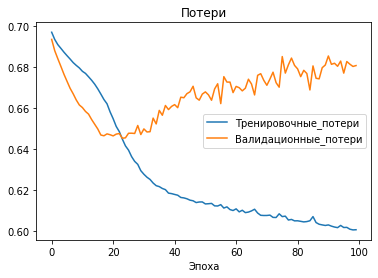

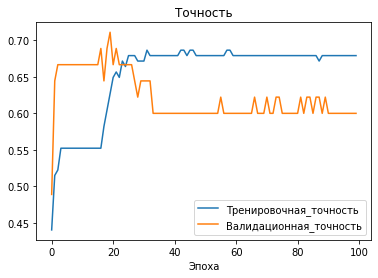

In [163]:
plot_loss_curves(history13)

In [164]:
tf.random.set_seed(42)

model14 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model14.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history14 = model14.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=10,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model14.name)])

Epoch 1/100
14/14 [==============================] - 2s 100ms/step - loss: 0.6890 - accuracy: 0.5597 - val_loss: 0.6836 - val_accuracy: 0.6667
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5522 - val_loss: 0.6736 - val_accuracy: 0.6667
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5522 - val_loss: 0.6678 - val_accuracy: 0.6667
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6738 - accuracy: 0.5522 - val_loss: 0.6613 - val_accuracy: 0.6667
Epoch 5/100
14/14 [==============================] - 1s 82ms/step - loss: 0.6677 - accuracy: 0.5522 - val_loss: 0.6572 - val_accuracy: 0.6889
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.5597 - val_loss: 0.6589 - val_accuracy: 0.6000
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6564 - accuracy: 0.6567 - val_loss: 0.6508 - val_accuracy: 0.6444
Epoch 8/10

In [165]:
model14.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.3249 - accuracy: 1.0000


[0.32490432262420654, 1.0]

In [166]:
model14 = tf.keras.models.load_model(f"/content/model_experiments/{model14.name}")
model14.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 0.5309 - accuracy: 1.0000


[0.5308855772018433, 1.0]

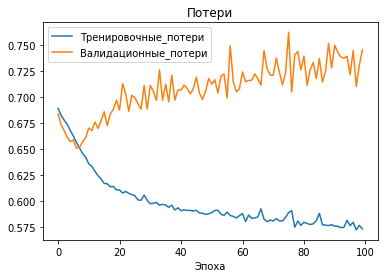

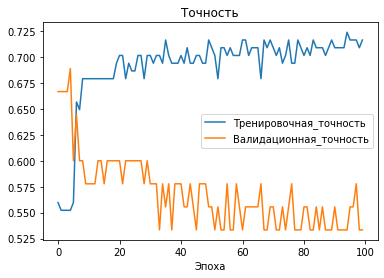

In [167]:
plot_loss_curves(history14)

In [168]:
tf.random.set_seed(42)

model15 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model15.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history15 = model15.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=10,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model15.name)])

Epoch 1/100
14/14 [==============================] - 2s 103ms/step - loss: 0.6938 - accuracy: 0.4925 - val_loss: 0.6827 - val_accuracy: 0.6667
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6852 - accuracy: 0.5522 - val_loss: 0.6646 - val_accuracy: 0.6667
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6774 - accuracy: 0.5522 - val_loss: 0.6561 - val_accuracy: 0.6667
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.5522 - val_loss: 0.6444 - val_accuracy: 0.6667
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6604 - accuracy: 0.5522 - val_loss: 0.6446 - val_accuracy: 0.6667
Epoch 6/100
14/14 [==============================] - 1s 93ms/step - loss: 0.6520 - accuracy: 0.5746 - val_loss: 0.6557 - val_accuracy: 0.6889
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.6493 - val_loss: 0.6414 - val_accuracy: 0.6667
Epoch 8/10

In [169]:
model15.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.2323 - accuracy: 1.0000


[0.23225045204162598, 1.0]

In [170]:
model15 = tf.keras.models.load_model(f"/content/model_experiments/{model15.name}")
model15.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 186ms/step - loss: 0.4371 - accuracy: 1.0000


[0.4370814263820648, 1.0]

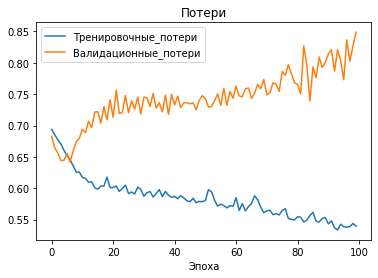

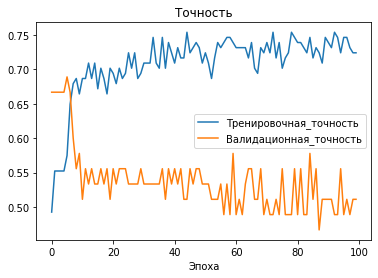

In [171]:
plot_loss_curves(history15)

In [ ]:
tf.random.set_seed(42)

model16 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),

    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),

    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model16.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.0003),
    metrics=["accuracy"]
)


history16 = model16.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model16.name)])

Epoch 1/100
27/27 [==============================] - 2s 56ms/step - loss: 0.6922 - accuracy: 0.6716 - val_loss: 0.6921 - val_accuracy: 0.5778
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5970 - val_loss: 0.6915 - val_accuracy: 0.5556
Epoch 3/100
20/27 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.6000

In [ ]:
model16.evaluate(X_test_scaled, y_test)

In [ ]:
model16 = tf.keras.models.load_model(f"/content/model_experiments/{model16.name}")
model16.evaluate(X_test_scaled, y_test)

In [ ]:
plot_loss_curves(history16)

In [ ]:
tf.random.set_seed(42)

model17 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model17.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.0003),
    metrics=["accuracy"]
)


history17 = model17.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model17.name)])

In [ ]:
model17.evaluate(X_test_scaled, y_test)

In [ ]:
model17 = tf.keras.models.load_model(f"/content/model_experiments/{model17.name}")
model17.evaluate(X_test_scaled, y_test)

In [ ]:
plot_loss_curves(history17)

In [ ]:
tf.random.set_seed(42)

model18 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model18.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.0003),
    metrics=["accuracy"]
)


history18 = model18.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model18.name)])

In [ ]:
model18.evaluate(X_test_scaled, y_test)

In [ ]:
model18 = tf.keras.models.load_model(f"/content/model_experiments/{model18.name}")
model18.evaluate(X_test_scaled, y_test)

In [ ]:
plot_loss_curves(history18)

In [ ]:
tf.random.set_seed(42)

model19 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),


    tf.keras.layers.Dense(1, activation='sigmoid')
])

model19.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.0003),
    metrics=["accuracy"]
)


history19 = model19.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model19.name)])

In [ ]:
model19.evaluate(X_test_scaled, y_test)

In [ ]:
model19 = tf.keras.models.load_model(f"/content/model_experiments/{model19.name}")
model19.evaluate(X_test_scaled, y_test)

In [ ]:
plot_loss_curves(history19)

In [ ]:
tf.random.set_seed(42)

model20 = tf.keras.Sequential([
    tf.keras.layers.Dense(featuresNum, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model20.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.0003),
    metrics=["accuracy"]
)


history20 = model20.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[create_model_checkpoint(model_name=model20.name)])

In [ ]:
model20.evaluate(X_test_scaled, y_test)

In [ ]:
model20 = tf.keras.models.load_model(f"/content/model_experiments/{model20.name}")
model20.evaluate(X_test_scaled, y_test)

In [ ]:
plot_loss_curves(history20)

In [ ]:
y

In [ ]:
y = data['Нарушения сна больше 5']
# X = data.drop(columns=['Нарушения сна больше 5'])
# X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.003), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history0 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [ ]:
plot_loss_curves(history0)

### Find bels LR

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history_lr = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # lrs - x-axis, history - y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history1 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

In [ ]:
plot_loss_curves(history1)

In [ ]:
train_data = data[:121] # 70%
validation_data = data[121:155] # 20%
test_data = data[155:174] # 10%

In [ ]:
y_train = train_data['Нарушения сна больше 5']
y_validation = validation_data['Нарушения сна больше 5']
y_test = test_data['Нарушения сна больше 5']

X_train = train_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_validation = validation_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_test = test_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]

In [ ]:
len(y_train), len(y_validation), len(y_test)

In [ ]:
# y = data['Нарушения сна']
# # X = data.drop(columns=['Нарушения сна'])
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_validation_scaled, y_validation))

In [ ]:
plot_loss_curves(history)

### It is very likely that the model has overfitted. It is necessary to add data augmentation, validation data, visualization
Find best lr

Вывести наиболее значимые характеристики



Check result on different scalers. For example:

1) Min Max Scaler (try it)

2) Standard Scaler

3) Max Abs Scaler

4) Robust Scaler

5) Quantile Transformer Scaler

6) Power Transformer Scaler

7) Unit Vector Scaler



In [ ]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога больше 7', 'Madrs больше 6', 'Калгари больше 5'])
y = data['Нарушения сна больше 5']
# X = data.drop(columns=['Нарушения сна'])
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']] # 'Были ли нарушения сна', 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Scale X from 0 to 1
scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history2 = model2.fit(X_train_scaled, y_train, epochs=50)